In [136]:
import sys
import scipy
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [137]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [138]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [140]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [141]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [142]:
train.shape

(891, 12)

In [143]:
test.shape

(418, 11)

In [144]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

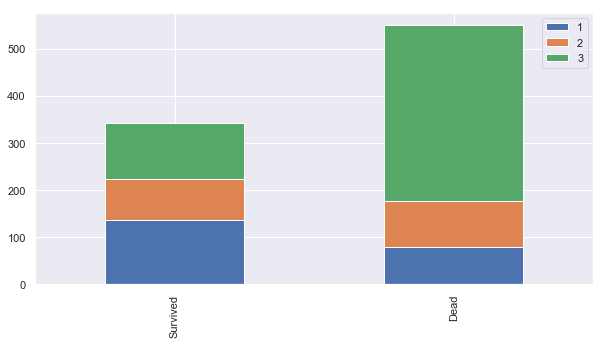

In [145]:
bar_chart('Pclass')

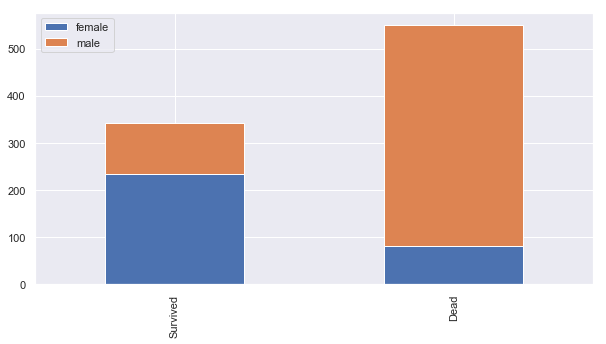

In [146]:
bar_chart("Sex")

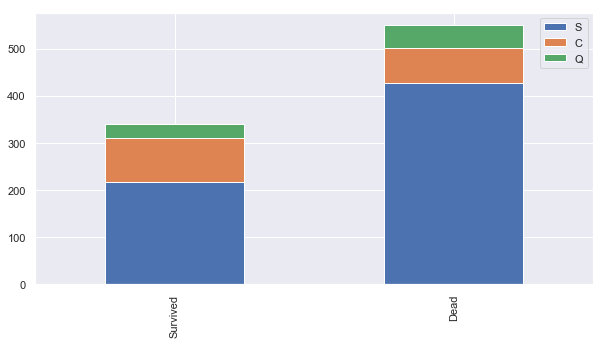

In [147]:
bar_chart("Embarked")

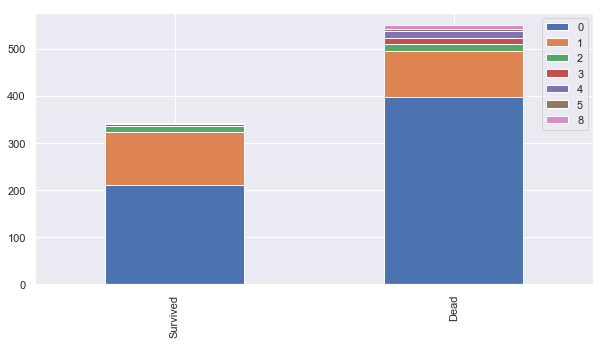

In [148]:
bar_chart("SibSp")

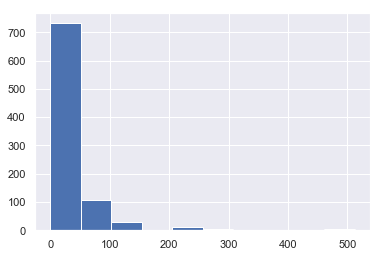

In [149]:
train['Fare'].hist()

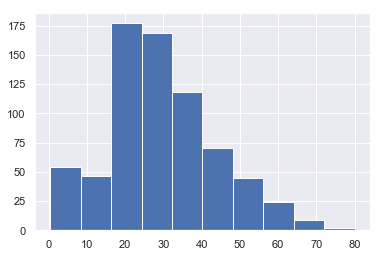

In [150]:
train['Age'].hist()

In [151]:

train_test_combine = [train, test]
for dataset in train_test_combine:
        dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand = False)
        
        

In [152]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Countess      1
Mme           1
Lady          1
Ms            1
Don           1
Sir           1
Capt          1
Name: Title, dtype: int64

In [153]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3, "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona": 3, "Mme": 3, "Capt": 3, "Sir": 3}
male_mapping = {"male": 1, 'female': 0}
female_mapping = {"male": 0, 'female': 1}
c_mapping = {"C": 1, "S": 0, "Q": 0}
s_mapping = {"C": 0, "S": 1, "Q": 0}
q_mapping = {"C": 0, "S": 0, "Q": 1}
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_combine:
    dataset["Embarked"] = dataset["Embarked"].fillna('S')
    dataset["Title"] = dataset['Title'].map(title_mapping)
    dataset["Male"] = dataset['Sex'].map(male_mapping)
    dataset["Female"] = dataset['Sex'].map(female_mapping)
    dataset["Cherbourg"] = dataset['Embarked'].map(c_mapping)
    dataset["Queenstown"] = dataset['Embarked'].map(q_mapping)
    dataset["Southampton"] = dataset['Embarked'].map(s_mapping)
    dataset["Cabin"] = dataset["Cabin"].str[:1]   
         

train.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null int64
Male           891 non-null int64
Female         891 non-null int64
Cherbourg      891 non-null int64
Queenstown     891 non-null int64
Southampton    891 non-null int64
dtypes: float64(2), int64(11), object(5)
memory usage: 125.4+ KB


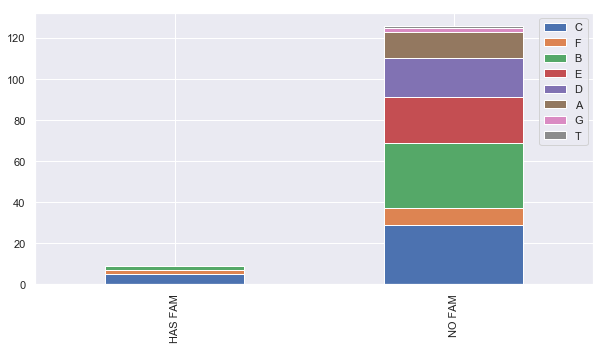

In [154]:
hasFamily = train[train["SibSp"] > 1]["Cabin"].value_counts()
noFamily = train[train["SibSp"] == 0]["Cabin"].value_counts()


familyFrame = pd.DataFrame([hasFamily, noFamily])
familyFrame.index = ['HAS FAM', 'NO FAM']
familyFrame.plot(kind='bar', stacked=True, figsize=(10,5))

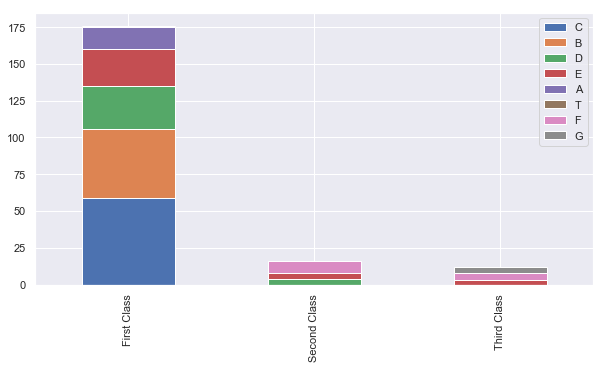

In [155]:
fCabin = train[train["Pclass"] == 1]["Cabin"].value_counts()
sCabin = train[train["Pclass"] == 2]["Cabin"].value_counts()
tCabin = train[train["Pclass"] == 3]["Cabin"].value_counts()

classFrame = pd.DataFrame([fCabin, sCabin, tCabin])
classFrame.index = ['First Class', 'Second Class', 'Third Class']
classFrame.plot(kind='bar', stacked=True, figsize=(10,5))
for dataset in train_test_combine:
         dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)
         dataset.loc[(dataset["SibSp"] >= 1) & (dataset["Ticket"]), 'TicketFam'] = 1
         dataset.loc[(dataset["SibSp"] < 1) & (dataset["Ticket"]), 'TicketFam'] = 0

In [156]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace = True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace = True)
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace = True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace = True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace = True)
train["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace = True)

In [157]:
drops = ['Name', 'Sex', 'Embarked']

train.drop(drops, axis=1, inplace = True)
test.drop(drops, axis =1, inplace = True)

train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis =1, inplace= True)


train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Title,Male,Female,Cherbourg,Queenstown,Southampton,TicketFam
0,1,0,3,22.0,1,0,7.2500,2.0,0,1,0,0,0,1,1.0
1,2,1,1,38.0,1,0,71.2833,0.8,2,0,1,1,0,0,1.0
2,3,1,3,26.0,0,0,7.9250,2.0,1,0,1,0,0,1,0.0
3,4,1,1,35.0,1,0,53.1000,0.8,2,0,1,0,0,1,1.0
4,5,0,3,35.0,0,0,8.0500,2.0,0,1,0,0,0,1,0.0


In [158]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          891 non-null float64
Title          891 non-null int64
Male           891 non-null int64
Female         891 non-null int64
Cherbourg      891 non-null int64
Queenstown     891 non-null int64
Southampton    891 non-null int64
TicketFam      891 non-null float64
dtypes: float64(4), int64(11)
memory usage: 104.5 KB


In [159]:
#Fit models Guassian Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

k_fold = KFold(n_splits= 10, shuffle= True, random_state=0)
gnb = GaussianNB()

X = train.drop(["Survived"], axis= 1)
Y = train.Survived

scoring = 'accuracy'
score = cross_val_score(gnb, X, Y, cv=k_fold, n_jobs = 1, scoring= scoring)
print(score)

[0.83333333 0.7752809  0.76404494 0.76404494 0.73033708 0.79775281
 0.78651685 0.84269663 0.82022472 0.80898876]


In [160]:
round(np.mean(score)*100, 2)

79.23

In [161]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

scoring = 'accuracy'
score = cross_val_score(mlp, X, Y, cv=k_fold, n_jobs = 1, scoring= scoring)
print(score)

[0.7        0.68539326 0.62921348 0.78651685 0.70786517 0.61797753
 0.69662921 0.79775281 0.76404494 0.75280899]


In [162]:
round(np.mean(score)*100, 2)

71.38

In [163]:
for dataset in train_test_combine:
    dataset.loc[(dataset["SibSp"] >= 1) & (dataset["Cabin"]), 'CabinFamily'] = 1
    dataset.loc[(dataset["SibSp"] < 1) & (dataset["Cabin"]), 'CabinFamily'] = 0
    

train["CabinFamily"].fillna(train.groupby("Pclass")["CabinFamily"].transform("median"), inplace = True)
test["CabinFamily"].fillna(test.groupby("Pclass")["CabinFamily"].transform("median"), inplace = True)



train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          891 non-null float64
Title          891 non-null int64
Male           891 non-null int64
Female         891 non-null int64
Cherbourg      891 non-null int64
Queenstown     891 non-null int64
Southampton    891 non-null int64
TicketFam      891 non-null float64
CabinFamily    891 non-null float64
dtypes: float64(5), int64(11)
memory usage: 111.5 KB


In [164]:
k_fold = KFold(n_splits= 10, shuffle= True, random_state=0)
gnb = GaussianNB()

X = train.drop(["Survived"], axis= 1)
Y = train.Survived

scoring = 'accuracy'
score = cross_val_score(gnb, X, Y, cv=k_fold, n_jobs = 1, scoring= scoring)
print(score)

[0.83333333 0.7752809  0.76404494 0.7752809  0.73033708 0.82022472
 0.78651685 0.83146067 0.83146067 0.82022472]


In [165]:
round(np.mean(score)*100, 2)

79.68

In [166]:
gnb = GaussianNB()

gnb.fit(X,Y)
test_data = test.copy()
pred = gnb.predict(test_data)

submission= pd.DataFrame ({"PassengerId": test["PassengerId"], "Survived": pred})
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
